In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [108]:
from google.colab import files
files.upload()

Saving metadata.csv to metadata (1).csv


{'metadata.csv': b'Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,Penicillin,NG_MAST,Group,azm_mic,cip_mic,cro_mic,cfx_mic,tet_mic,pen_mic,log2_azm_mic,log2_cip_mic,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr\r\nERR1549286,2015,UK,Europe,,>256,,0.016,,,,9768,1058,512,NA,0.016,NA,NA,NA,9,NA,-5.965784285,NA,NA,NA,1,NA,0,NA,NA,NA\r\nERR1549290,2015,UK,Europe,,>256,,0.004,,,,9768,1058,512,NA,0.004,NA,NA,NA,9,NA,-7.965784285,NA,NA,NA,1,NA,0,NA,NA,NA\r\nERR1549291,2015,UK,Europe,,>256,,0.006,,,,9768,1058,512,NA,0.006,NA,NA,NA,9,NA,-7.380821784,NA,NA,NA,1,NA,0,NA,NA,NA\r\nERR1549287,2015,UK,Europe,,>256,,0.006,,,,9768,1058,512,NA,0.006,NA,NA,NA,9,NA,-7.380821784,NA,NA,NA,1,NA,0,NA,NA,NA\r\nERR1549288,2015,UK,Europe,,>256,,0.008,,,,9768,1058,512,NA,0.008,NA,NA,NA,9,NA,-6.965784285,NA,NA,NA,1,NA,0,NA,NA,NA\r\nERR1549299,2015,UK,Europe,,>256,,0.012,,,,NA,0,512,NA,0.012,NA,NA,NA,9,NA,-6

In [109]:
dna_data = pd.read_csv('metadata.csv')
dna_data

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,ERR2172350,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3782,ERR2172351,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3783,ERR2172352,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3784,ERR2172353,2015.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [110]:
type(dna_data)  # print the type of dataset

pandas.core.frame.DataFrame

In [111]:
dna_data.head() # print the first 5 rows for inspection

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN


In [112]:
dna_data.tail() # print the last 5 rows for inspection

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
3781,ERR2172350,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3782,ERR2172351,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3783,ERR2172352,2016.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3784,ERR2172353,2015.0,UK,Europe,NaN,>256,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3785,ERR2172354,2014.0,UK,Europe,NaN,0.19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [113]:
dna_data.shape  # print the number of rows and columns

(3786, 31)

In [114]:
dna_data.info() # print the summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample_ID       3786 non-null   object 
 1   Year            3536 non-null   float64
 2   Country         3785 non-null   object 
 3   Continent       3785 non-null   object 
 4   Beta.lactamase  1927 non-null   object 
 5   Azithromycin    3480 non-null   object 
 6   Ciprofloxacin   3129 non-null   object 
 7   Ceftriaxone     3436 non-null   object 
 8   Cefixime        3405 non-null   object 
 9   Tetracycline    1472 non-null   object 
 10  Penicillin      1465 non-null   object 
 11  NG_MAST         3779 non-null   object 
 12  Group           3786 non-null   int64  
 13  azm_mic         3478 non-null   float64
 14  cip_mic         3088 non-null   float64
 15  cro_mic         3434 non-null   float64
 16  cfx_mic         3401 non-null   float64
 17  tet_mic         1472 non-null   f

In [115]:
dna_data.describe() # print the statistical summary of all numerical attributes

,Year,Group,azm_mic,cip_mic,cro_mic,cfx_mic,tet_mic,pen_mic,log2_azm_mic,log2_cip_mic,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
count,3536.000000,3786.000000,3478.000000,3088.000000,3434.000000,3401.000000,1472.00000,1465.000000,3478.000000,3088.000000,3434.000000,3401.000000,1472.000000,1465.000000,3478.000000,3088.000000,3434.000000,3401.00000,1472.000000,1465.00000
mean,2010.300622,394.334390,17.118781,7.428788,0.029991,0.064405,7.38609,3.044142,-1.107628,-2.043590,-6.203940,-5.164221,0.835492,-0.427788,0.128522,0.462435,0.001165,0.00147,0.554348,0.34744
std,4.670817,326.263267,90.864520,11.266796,0.080375,0.199151,22.10079,15.447995,2.749441,5.444110,1.772691,1.664672,2.337490,2.259337,0.334718,0.498668,0.034115,0.03832,0.497206,0.47632
min,1979.000000,0.000000,0.004000,0.001000,0.000250,0.001000,0.00800,0.002000,-7.965784,-9.965784,-11.965784,-9.965784,-6.965784,-8.965784,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,2009.000000,134.000000,0.125000,0.004000,0.004000,0.015000,0.50000,0.250000,-3.000000,-7.965784,-7.965784,-6.058894,-1.000000,-2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,2012.000000,275.000000,0.380000,0.094000,0.015000,0.016000,2.00000,0.500000,-1.395929,-3.411195,-6.058894,-5.965784,1.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.00000
75%,2013.000000,618.000000,1.000000,16.000000,0.032000,0.060000,4.00000,2.000000,0.000000,4.000000,-4.965784,-4.058894,2.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.00000
max,2017.000000,1078.000000,1024.000000,64.000000,2.000000,8.000000,256.00000,512.000000,10.000000,6.000000,1.000000,3.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


In [116]:
# checking missing values
dna_data.isnull().sum()

Sample_ID            0
Year               250
Country              1
Continent            1
Beta.lactamase    1859
Azithromycin       306
Ciprofloxacin      657
Ceftriaxone        350
Cefixime           381
Tetracycline      2314
Penicillin        2321
NG_MAST              7
Group                0
azm_mic            308
cip_mic            698
cro_mic            352
cfx_mic            385
tet_mic           2314
pen_mic           2321
log2_azm_mic       308
log2_cip_mic       698
log2_cro_mic       352
log2_cfx_mic       385
log2_tet_mic      2314
log2_pen_mic      2321
azm_sr             308
cip_sr             698
cro_sr             352
cfx_sr             385
tet_sr            2314
pen_sr            2321
dtype: int64

In [117]:
dna_data = dna_data.dropna()  # remove the null values

In [118]:
dna_data.isnull().sum()  # checking the null values

Sample_ID         0
Year              0
Country           0
Continent         0
Beta.lactamase    0
Azithromycin      0
Ciprofloxacin     0
Ceftriaxone       0
Cefixime          0
Tetracycline      0
Penicillin        0
NG_MAST           0
Group             0
azm_mic           0
cip_mic           0
cro_mic           0
cfx_mic           0
tet_mic           0
pen_mic           0
log2_azm_mic      0
log2_cip_mic      0
log2_cro_mic      0
log2_cfx_mic      0
log2_tet_mic      0
log2_pen_mic      0
azm_sr            0
cip_sr            0
cro_sr            0
cfx_sr            0
tet_sr            0
pen_sr            0
dtype: int64

In [119]:
dna_data.head()

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
1688,10356_1#1,1998.0,Brasil,America,S,0.032,0.002,0.002,0.016,0.5,...,-8.965784,-5.965784,-1.000000,-3.000000,0.0,0.0,0.0,0.0,0.0,0.0
1689,10356_1#10,2008.0,Brasil,America,S,0.125,0.19,0.012,0.016,24,...,-6.380822,-5.965784,4.584963,-3.000000,0.0,0.0,0.0,0.0,1.0,0.0
1690,10356_1#11,2008.0,Chile,America,S,0.75,6,0.023,0.016,1,...,-5.442222,-5.965784,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
1691,10356_1#12,2008.0,Ecuador,America,R,0.064,0.006,0.006,0.016,12,...,-7.380822,-5.965784,3.584963,0.584963,0.0,0.0,0.0,0.0,1.0,1.0
1692,10356_1#15,1998.0,USA,America,S,0.125,32,0.004,0.016,1.5,...,-7.965784,-5.965784,0.584963,-1.000000,0.0,1.0,0.0,0.0,1.0,0.0


In [120]:
dna_data['Beta.lactamase'].value_counts()

S    528
0    379
R    121
1     20
2     11
Name: Beta.lactamase, dtype: int64

In [148]:
dna_data.replace({"Beta.lactamase": {'S': 0, '0': 1, 'R': 2, '1': 3, '2': 4}}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


**DATA VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


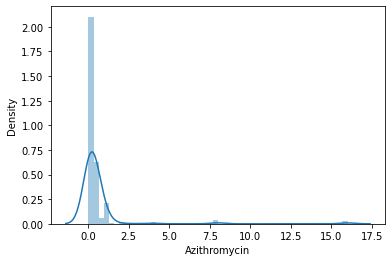

In [149]:
sns.distplot(dna_data['Azithromycin'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


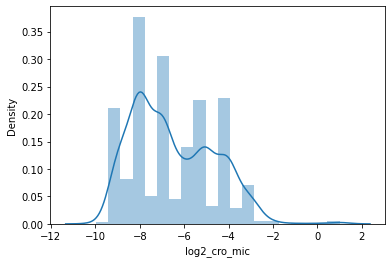

In [150]:
sns.distplot(dna_data['log2_cro_mic'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


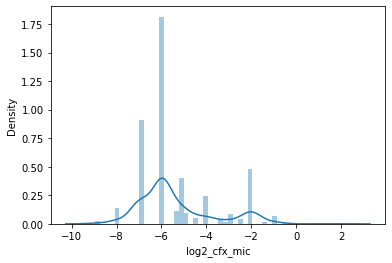

In [151]:
sns.distplot(dna_data['log2_cfx_mic'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


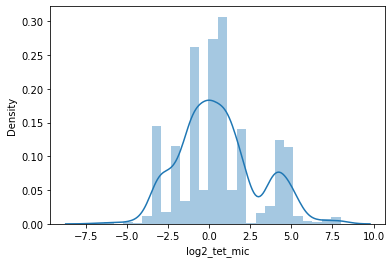

In [152]:
sns.distplot(dna_data['log2_tet_mic'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


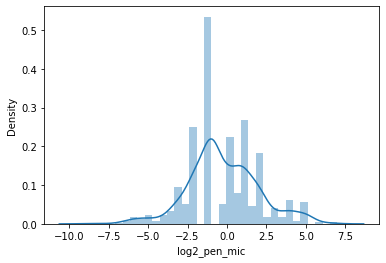

In [153]:
sns.distplot(dna_data['log2_pen_mic'])

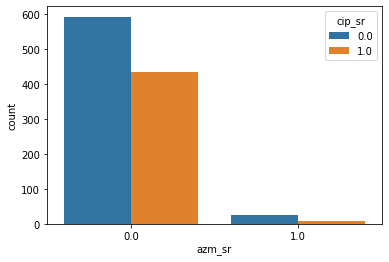

In [154]:
sns.countplot(x = 'azm_sr', hue = 'cip_sr', data = dna_data)

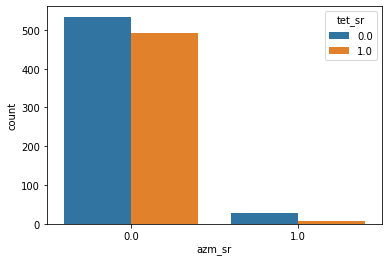

In [155]:
sns.countplot(x = 'azm_sr', hue = 'tet_sr', data = dna_data)

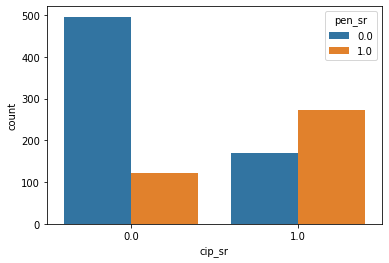

In [156]:
sns.countplot(x = 'cip_sr', hue = 'pen_sr', data = dna_data)

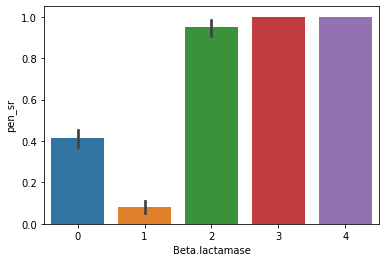

In [157]:
sns.barplot(x = 'Beta.lactamase', y = 'pen_sr', data = dna_data)

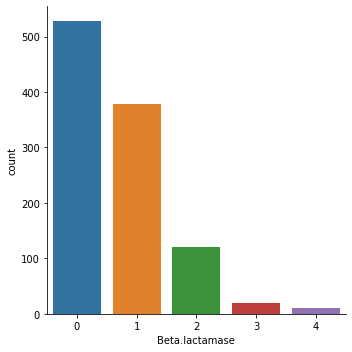

In [158]:
sns.catplot(x = 'Beta.lactamase', data = dna_data, kind = 'count')

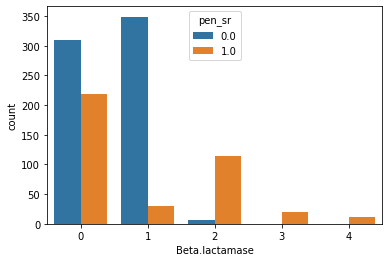

In [159]:
sns.countplot(x = 'Beta.lactamase', hue = 'pen_sr', data = dna_data)

In [210]:
# seperating the data and labels
X = dna_data.drop(columns = ['Sample_ID', 'Country', 'Continent', 'pen_sr'],  axis = 1) 
Y = dna_data['pen_sr']

In [211]:
print(X)

        Year  Beta.lactamase  Azithromycin  Ciprofloxacin Ceftriaxone  \
1688  1998.0               0         0.032          0.002       0.002   
1689  2008.0               0         0.125          0.190       0.012   
1690  2008.0               0         0.750          6.000       0.023   
1691  2008.0               2         0.064          0.006       0.006   
1692  1998.0               0         0.125         32.000       0.004   
...      ...             ...           ...            ...         ...   
3680  2015.0               1         0.250          0.004       0.004   
3681  2015.0               1         0.120          0.002       0.004   
3682  2015.0               1         0.500          0.004       0.008   
3683  2015.0               1         0.500          8.000        0.06   
3684  2015.0               1         0.250          0.004       0.004   

     Cefixime Tetracycline Penicillin NG_MAST  Group  ...  log2_cip_mic  \
1688    0.016          0.5      0.125      64   

In [212]:
print(Y)

1688    0.0
1689    0.0
1690    0.0
1691    1.0
1692    0.0
       ... 
3680    0.0
3681    0.0
3682    0.0
3683    0.0
3684    0.0
Name: pen_sr, Length: 1059, dtype: float64


In [213]:
# Train and Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [214]:
print(X.shape, X_train.shape, X_test.shape)

(1059, 27) (953, 27) (106, 27)


In [215]:
print(X_train)

        Year  Beta.lactamase  Azithromycin  Ciprofloxacin Ceftriaxone  \
1840  2009.0               0         0.250          1.000       0.047   
1888  2009.0               0         0.190         32.000       0.032   
1709  1993.0               0         0.125          0.006       0.047   
1948  2008.0               0         0.500         32.000       0.125   
1876  2008.0               0         0.500          6.000       0.002   
...      ...             ...           ...            ...         ...   
2190  2010.0               0        16.000         16.000       0.063   
3481  2015.0               1         0.250          0.004       0.008   
1901  2009.0               0         0.500          0.120       0.023   
2178  2009.0               0         0.250          1.000       0.008   
3413  2015.0               1         0.250          0.002       0.004   

     Cefixime Tetracycline Penicillin NG_MAST  Group  ...  log2_cip_mic  \
1840    0.047            1        1.5    6095   

In [216]:
print(Y_train)

1840    1.0
1888    1.0
1709    1.0
1948    1.0
1876    0.0
       ... 
2190    1.0
3481    0.0
1901    1.0
2178    1.0
3413    0.0
Name: pen_sr, Length: 953, dtype: float64
